In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dog-bark-eda/dog-bark3.wav
/kaggle/input/urbansound8k/UrbanSound8K.csv
/kaggle/input/urbansound8k/fold7/164797-2-0-8.wav
/kaggle/input/urbansound8k/fold7/177537-7-2-0.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-68.wav
/kaggle/input/urbansound8k/fold7/6902-2-0-18.wav
/kaggle/input/urbansound8k/fold7/518-4-0-2.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-2.wav
/kaggle/input/urbansound8k/fold7/116485-3-2-4.wav
/kaggle/input/urbansound8k/fold7/518-4-0-3.wav
/kaggle/input/urbansound8k/fold7/44737-5-0-2.wav
/kaggle/input/urbansound8k/fold7/201988-5-0-3.wav
/kaggle/input/urbansound8k/fold7/181102-9-0-50.wav
/kaggle/input/urbansound8k/fold7/99812-1-6-0.wav
/kaggle/input/urbansound8k/fold7/39857-5-0-0.wav
/kaggle/input/urbansound8k/fold7/61503-2-0-6.wav
/kaggle/input/urbansound8k/fold7/162728-1-0-0.wav
/kaggle/input/urbansound8k/fold7/89443-9-0-48.wav
/kaggle/input/urbansound8k/fold7/168846-5-1-13.wav
/kaggle/input/urbansound8k/fold7/149193-5-0-2.wav
/kaggle/input/urbansoun

**Classes**
10 classes: 
* air_conditioner
* car_horn
* children_playing
* dog_bark
* drilling
* enginge_idling
* gun_shot
* jackhammer
* siren
* street_music

**Librosa** simplifies working with audio files by providing a high-level interface and a comprehensive set of functions. It allows users to perform audio data preprocessing, feature extraction, visualization, analysis, and even advanced techniques like music genre classification and audio source separation.

In [2]:
import librosa
import librosa.display
import numpy as np
import pandas
import matplotlib.pyplot as plt
import IPython.display as ipd
from tqdm import tqdm

# EDA

Loading the audio file:

librosa.load(filename) loads the audio file and returns the audio time series data and the sampling rate.
Creating the waveform plot:

* plt.figure(figsize=(14, 5)) sets the size of the plot.
* librosa.display.waveshow(data, sr=sample_rate) plots the waveform of the audio file.


Playing the audio:

ipd.Audio(filename) creates an audio player that allows you to play the audio file within a Jupyter notebook.


We will be seeing the visual representation of sample audio of dog barking.

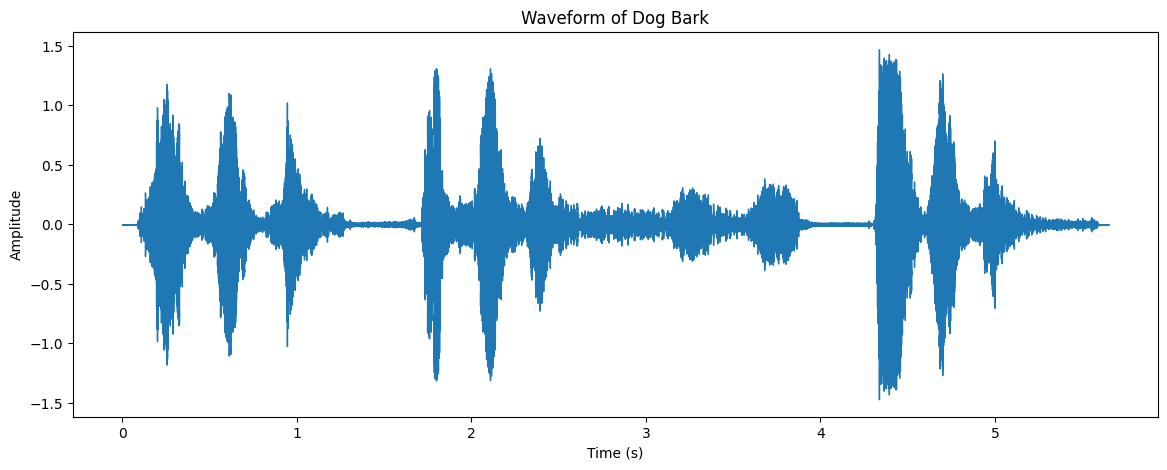

In [3]:
# Loading the audio that is in the form of wave file using 
filename="/kaggle/input/dog-bark-eda/dog-bark3.wav"
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
plt.title("Waveform of Dog Bark")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
ipd.Audio(filename)

The sample rate, also known as the sampling rate or sampling frequency, is the number of samples of audio recorded per second. It is measured in Hertz (Hz). In digital audio, the sample rate is crucial because it determines the fidelity of the audio recording. For example, a sample rate of 44.1 kHz means 44,100 samples are taken per second.




#### **The sample rate plays a significant role in audio classification for several reasons:**

1. Signal Quality and Fidelity
* High Sample Rates: Provide more detailed information about the audio signal, capturing higher frequencies and subtle nuances. This can be beneficial for distinguishing between classes that have small differences in high-frequency content.
* Low Sample Rates: May miss some of the finer details and high-frequency information, potentially leading to less accurate classification. However, they reduce computational load and storage requirements.
2. Feature Extraction
Many audio classification methods rely on features such as Mel-frequency cepstral coefficients (MFCCs), spectral features, and time-domain features. The accuracy and granularity of these features depend on the sample rate:
* MFCCs: Higher sample rates can provide more detailed MFCCs, which can help in better capturing the characteristics of the audio signal.
* Spectral Features: Features like spectral centroid, bandwidth, and roll-off can be more precisely calculated with higher sample rates.
3. Computational Load
* Higher Sample Rates: Require more data points for the same duration of audio, leading to higher computational costs for processing and training classification models.
* Lower Sample Rates: Reduce the number of data points, leading to faster processing times and lower memory usage but potentially at the cost of losing important signal information.
4. Overfitting and Generalization
* High Sample Rates: Can lead to models that capture too much detail, including noise, which may result in overfitting, especially if the dataset is small.
* Low Sample Rates: Can help in focusing on the most important characteristics of the signal, potentially improving generalization but risking loss of discriminative features.
5. Model and Dataset Compatibility
The choice of sample rate should match the intended application and the characteristics of the dataset. For instance, speech recognition systems often use 16 kHz or 8 kHz, while music genre classification might benefit from 44.1 kHz or higher.
* Consistency is crucial: if the training data is sampled at one rate, the input data for classification should ideally be at the same rate to avoid discrepancies.

In [4]:
sample_rate

22050

In [5]:
data

array([3.6147504e-15, 7.0207266e-15, 1.0419975e-14, ..., 6.3444048e-08,
       6.9351564e-08, 3.5616917e-08], dtype=float32)

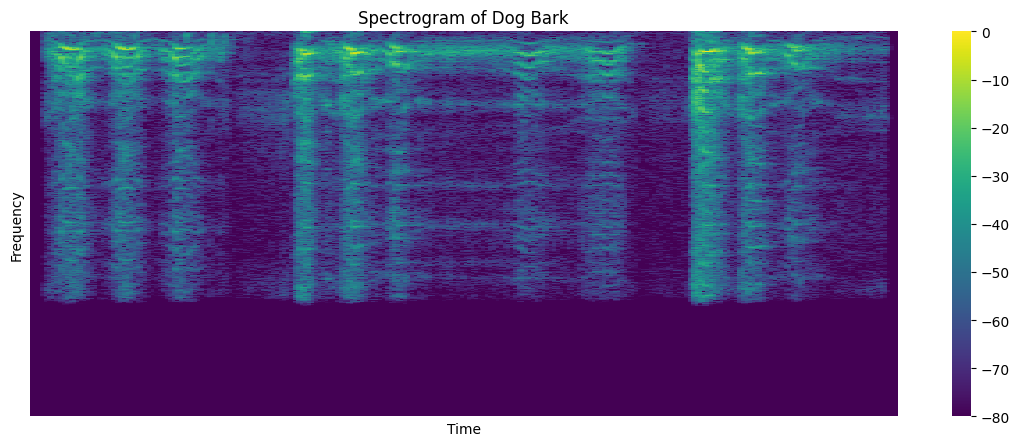

In [6]:
import seaborn as sns

# Compute the Short-Time Fourier Transform (STFT) to get the spectrogram
D = np.abs(librosa.stft(data))

# Convert the amplitude spectrogram to dB-scaled spectrogram
DB = librosa.amplitude_to_db(D, ref=np.max)

# Create a plot using Seaborn
plt.figure(figsize=(14, 5))
sns.heatmap(DB, xticklabels=False, yticklabels=False, cmap='viridis')
plt.title("Spectrogram of Dog Bark")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

In [7]:
df = pd.read_csv('/kaggle/input/urbansound8k/UrbanSound8K.csv')

In [8]:
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


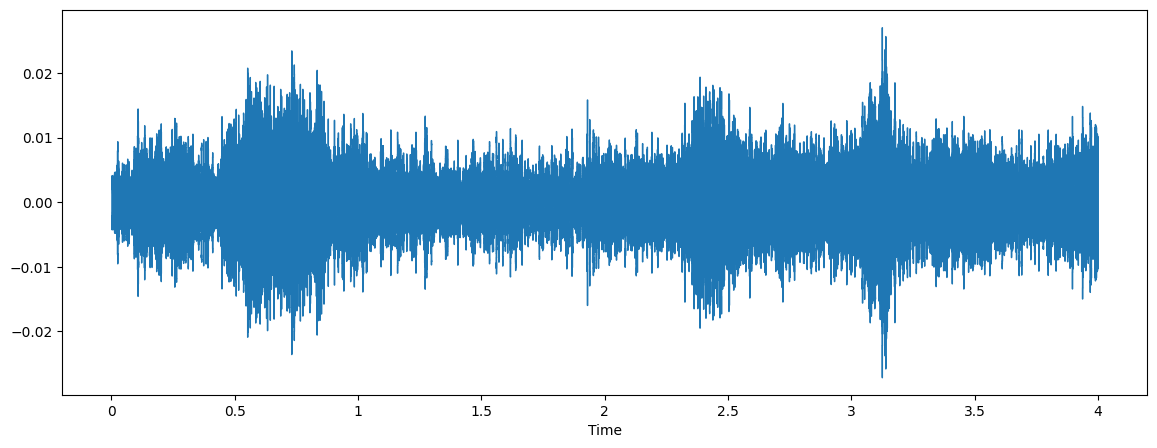

In [9]:
### Sound
filename='/kaggle/input/urbansound8k/fold5/100263-2-0-117.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [10]:
data

array([ 0.00274057,  0.00363865,  0.00230643, ..., -0.00752703,
       -0.00462696,  0.00097316], dtype=float32)

In [11]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)
wave_sample_rate

44100

In [12]:
wave_audio

array([[ 171,   63],
       [ 157,   86],
       [ 130,   96],
       ...,
       [  70, -205],
       [ 202, -159],
       [ 283,  -81]], dtype=int16)

Features of audio


**Note:** *'wave_audio'* and *'data'* are different which showcases the features extracted from the audio using scipy and librosa which are different.

In [13]:
df['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
jackhammer          1000
engine_idling       1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

The dataset is almost **balanced**.

# Data Preprocessing

* Here Librosa converts the signal to mono, meaning the channel will alays be 1.
* Librosa will always convert the audio into one-dimensional signal.

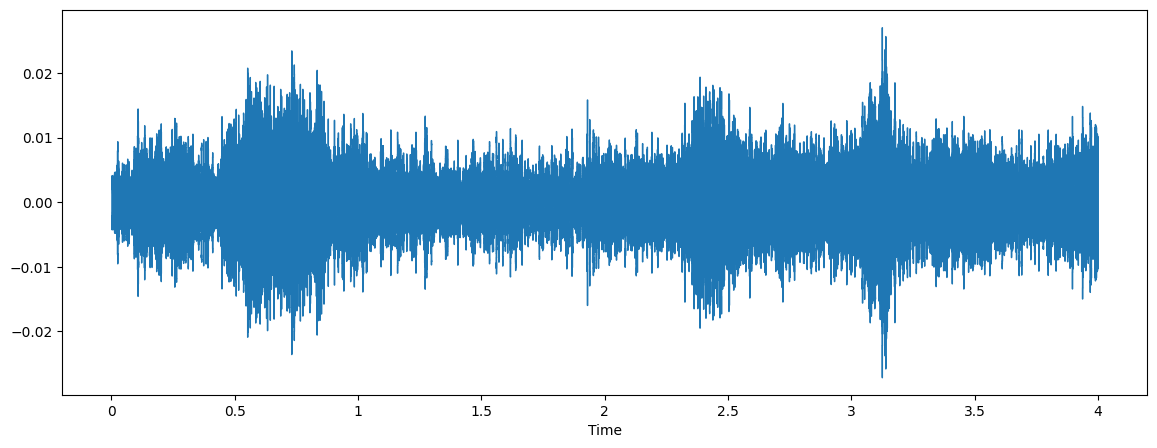

In [14]:
### Sound
filename='/kaggle/input/urbansound8k/fold5/100263-2-0-117.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

* **Scipy** will represent the audio the way it is instead of changing it to mono (single channel).

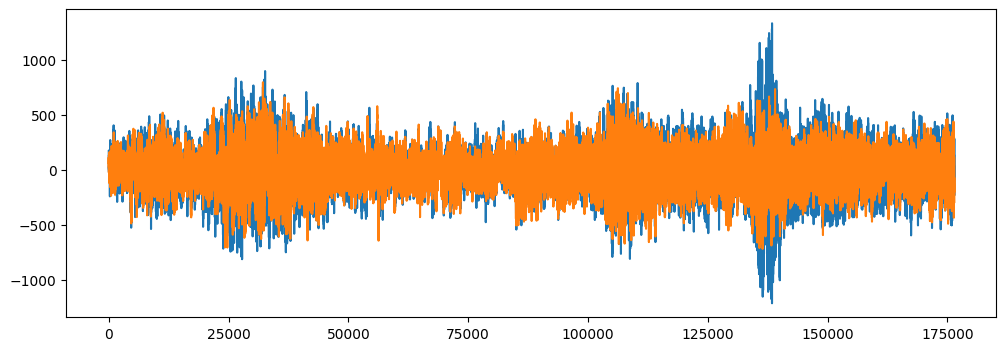

In [15]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)
plt.show()

In [16]:
wave_audio

array([[ 171,   63],
       [ 157,   86],
       [ 130,   96],
       ...,
       [  70, -205],
       [ 202, -159],
       [ 283,  -81]], dtype=int16)

Here audio is presented in the form of more than channel which is known as **stereo**.

# Extract Features
#### Here we will be using **Mel-Frequency Cepstral Coefficients(MFCC)** from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

### What is MFCC?
#### 1. **Sound Representation:** MFCCs represent how humans perceive the sound’s loudness and pitch. They are designed to capture the important characteristics of audio signals in a way that aligns more closely with human auditory perception.
#### 2. **Frequency Scale:** The Mel scale is used, which is a perceptual scale of pitches judged by listeners to be equal in distance from one another. This scale mimics human ear’s response more accurately than the linear frequency scale.

In [17]:
mfccs = librosa.feature.mfcc(y=data,sr=sample_rate)
print(mfccs.shape)

(20, 173)


In [18]:
mfccs

array([[-4.8605615e+02, -4.4730469e+02, -4.4184772e+02, ...,
        -4.2249933e+02, -4.1990128e+02, -4.3479315e+02],
       [ 9.0492447e+01,  9.8961349e+01,  9.8793579e+01, ...,
         7.7359352e+01,  7.3746567e+01,  7.3074303e+01],
       [-1.6820301e+01, -1.2406603e+01, -1.5042484e+01, ...,
        -3.1668331e+01, -2.8136139e+01, -2.9968552e+01],
       ...,
       [ 5.8084764e+00,  4.3385344e+00,  3.4394388e+00, ...,
        -3.5389700e+00, -1.6135114e+00, -1.8700218e-01],
       [-1.5638510e+00, -8.0133933e-01,  4.9208456e-01, ...,
        -6.4739552e+00, -1.5795990e+00,  2.0934393e+00],
       [ 2.5441132e+00,  3.9337294e+00,  2.1200745e+00, ...,
         2.3795490e+00,  2.3294854e+00,  5.6563568e+00]], dtype=float32)

In [19]:
# Function to extract MFCC features from an audio file
def features_extractor(file):
    audio, sample_rate = librosa.load(file) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate,n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features

In [20]:
# Directory containing the dataset
dataset_path = '/kaggle/input/urbansound8k'

# List to store extracted features and labels
extracted_features = []

# Loop through each audio file in the dataset
for index_num, row in tqdm(df.iterrows(), total=df.shape[0]):
    file_name = os.path.join(os.path.abspath(dataset_path), 'fold' + str(row["fold"]), str(row["slice_file_name"]))
    final_class_labels = row["class"]
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels])

 41%|████      | 3554/8732 [02:56<04:23, 19.62it/s]/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
 95%|█████████▌| 8323/8732 [06:45<00:16, 25.26it/s]/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
 95%|█████████▌| 8327/8732 [06:45<00:14, 28.69it/s]/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
100%|██████████| 8732/8732 [07:03<00:00, 20.63it/s]


In [21]:
features_df = pd.DataFrame(extracted_features, columns=['feature', 'class'])

# Show the DataFrame
features_df.head()

,feature,class
0,"[-211.93698, 62.58122, -122.813156, -60.745296...",dog_bark
1,"[-417.00525, 99.336624, -42.995586, 51.073326,...",children_playing
2,"[-452.39316, 112.36253, -37.578075, 43.195866,...",children_playing
3,"[-406.47922, 91.19661, -25.043556, 42.784523, ...",children_playing
4,"[-439.63873, 103.86224, -42.658787, 50.690285,...",children_playing


In [22]:
### Split the dataset into independent and dependent dataset
X=np.array(features_df['feature'].tolist())
y=np.array(features_df['class'].tolist())

In [23]:
X.shape

(8732, 40)

In [24]:
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

2024-06-19 05:59:50.795872: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-19 05:59:50.795968: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-19 05:59:50.939218: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [25]:
X.shape

(8732, 40)

In [26]:
### Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [27]:
x_train.shape

(6985, 40)

In [28]:
x_test.shape

(1747, 40)

In [29]:
y_train.shape

(6985, 10)

In [30]:
y_test.shape

(1747, 10)

# Model Training

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [32]:
num_labels=y.shape[1]

In [33]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
 91/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1039 - loss: 28.4559

I0000 00:00:1718776814.898190      83 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1131 - loss: 19.3837
Epoch 1: val_loss improved from inf to 2.28939, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.1131 - loss: 19.3405 - val_accuracy: 0.1110 - val_loss: 2.2894
Epoch 2/100
199/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1190 - loss: 2.6890
Epoch 2: val_loss improved from 2.28939 to 2.28118, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1193 - loss: 2.6747 - val_accuracy: 0.1076 - val_loss: 2.2812
Epoch 3/100
193/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1161 - loss: 2.3740
Epoch 3: val_loss improved from 2.28118 to 2.27449, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1159 - loss: 2.3704 - val_accuracy: 0.1070 - val_loss: 2.2745
Epoch 4/100
197/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1197 - l

In [35]:
test_accuracy=model.evaluate(x_test,y_test,verbose=0)
print(test_accuracy[1])

0.7601602673530579


# Testing on random sample

In [36]:
classes = {0:'air_conditioner', 1:'car_horn',2: 'children_playing', 3:'dog_bark', 4:'drilling', 5:'enginge_idling', 6:'gun_shot', 7:'jackhammer', 8:'siren',9: 'street_music'}

In [37]:
filename="/kaggle/input/dog-bark-eda/dog-bark3.wav"
audio, sample_rate = librosa.load(filename, res_type='polyphase') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)

[-1.7181099e+02  9.0175278e+01 -2.1207924e+01 -1.6527015e-01
 -4.1501690e+01 -4.6583381e+00 -3.7403656e+01  1.8725606e+00
 -9.5555744e+00 -2.5438278e+00 -6.1825147e+00  1.1150651e+01
  1.2639395e+01 -1.7140445e+00 -2.2727530e+00 -1.4712611e+00
  4.8199372e+00 -2.7159903e+00 -2.7047112e+00 -5.9607496e+00
  1.1232448e+00 -5.1526380e+00  8.5341841e-01 -1.4408102e+00
 -6.8200117e-01  4.1500621e+00 -4.2235348e-01  3.7315576e+00
 -9.6377093e-01 -3.0597558e+00  3.3293352e+00 -2.0469907e-01
  4.9671373e-01  6.9777209e-01 -5.7764113e-01  1.8762877e+00
 -1.2624735e+00 -1.7491533e+00 -1.0600846e+00  1.0447329e+00]


In [38]:
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

[[-1.7181099e+02  9.0175278e+01 -2.1207924e+01 -1.6527015e-01
  -4.1501690e+01 -4.6583381e+00 -3.7403656e+01  1.8725606e+00
  -9.5555744e+00 -2.5438278e+00 -6.1825147e+00  1.1150651e+01
   1.2639395e+01 -1.7140445e+00 -2.2727530e+00 -1.4712611e+00
   4.8199372e+00 -2.7159903e+00 -2.7047112e+00 -5.9607496e+00
   1.1232448e+00 -5.1526380e+00  8.5341841e-01 -1.4408102e+00
  -6.8200117e-01  4.1500621e+00 -4.2235348e-01  3.7315576e+00
  -9.6377093e-01 -3.0597558e+00  3.3293352e+00 -2.0469907e-01
   4.9671373e-01  6.9777209e-01 -5.7764113e-01  1.8762877e+00
  -1.2624735e+00 -1.7491533e+00 -1.0600846e+00  1.0447329e+00]]
(1, 40)


In [39]:
predicted_label=model.predict(mfccs_scaled_features)
print(predicted_label)
prediction_class = np.argmax(predicted_label)
classes[prediction_class]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
[[5.9077378e-05 1.9638934e-03 2.2100374e-02 8.2586986e-01 9.8347021e-03
  1.1700937e-04 7.1824580e-02 3.7211677e-08 1.8793516e-02 4.9437050e-02]]


'dog_bark'

### Another testcase

In [40]:
filename='/kaggle/input/carhorn/mixkit-car-horn-718.wav'
audio, sample_rate = librosa.load(filename, res_type='polyphase')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)

[[-3.3511334e+02  7.8725784e+01  1.2649924e-01 -5.0636802e+00
  -4.1916943e+00 -3.1655061e+00 -9.4921560e+00  5.1227970e+00
  -8.8104095e+00 -5.6027088e+00 -7.4616008e+00 -3.7372940e+00
  -7.9319439e+00 -2.2186489e+00  2.0716043e-01  1.2588266e+01
   1.4167097e+01  1.2300110e+01  3.7236729e+00  6.5535750e+00
   6.4080062e+00  1.3805719e+01  4.7165661e+00 -9.1978397e+00
  -1.8045330e+01 -1.1805917e+01  2.1645308e+00  7.2463217e+00
  -6.4566460e+00 -1.6141415e+01 -1.8131804e+00  1.7280361e+01
   1.8646896e+01  5.3874607e+00 -2.1236529e+00 -5.8512073e+00
  -1.0954337e+01 -7.6030140e+00 -1.0883377e+00  1.1002117e+01]]


In [41]:
predicted_label=model.predict(mfccs_scaled_features)
print(predicted_label)
prediction_class = np.argmax(predicted_label)
classes[prediction_class]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[3.0271567e-11 7.6390171e-01 2.2581544e-08 2.4244329e-03 1.2611591e-04
  2.8528048e-05 4.9353492e-08 7.9599792e-11 2.1421490e-08 2.3351918e-01]]


'car_horn'